In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from pathlib import Path
from keras.preprocessing import image

Using TensorFlow backend.


# Load Images

In [74]:
path = Path("./images/")
dirs = path.glob('*')

In [75]:
labels_dict = {
    "cat":0,
    "dog":1,
    "horse":2,
    "human": 3
}

labels = []
img_data = []

for folder in dirs:
    label  = str(folder).split("\\")[-1][:-1]
    
    for image_path in folder.glob("*.jpg"):
        img = image.load_img(image_path,target_size=(64,64))
        img_array = image.img_to_array(img)
        img_data.append(img_array)
        labels.append(labels_dict[label])

In [76]:
print(len(img_data))
print (labels)

808
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [77]:
img_data = np.array(img_data)
labels = np.array(labels)

In [78]:
(img_data).shape

(808, 64, 64, 3)

# Shuffle The Data

In [79]:
combined = list(zip(img_data,labels))
import random
random.shuffle(combined)
img_data[:], labels[:] = zip(*combined)

In [80]:
def drawimg(img):
    from matplotlib import pyplot as plt
    plt.axis('off')
    plt.imshow(img)
    plt.show()

0


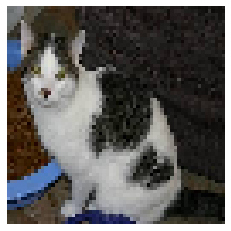

1


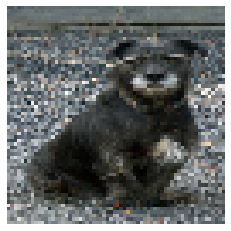

1


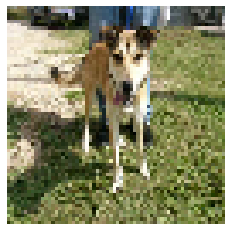

2


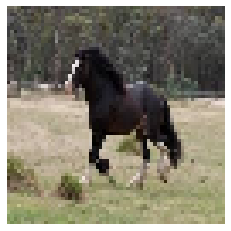

1


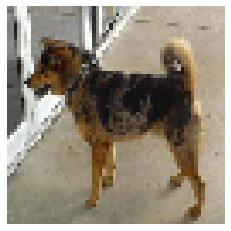

In [81]:
for i in range(5):
    print(labels[i])
    drawimg(img_data[i]/255.0)

# Convert Data for one-for-one Classification

In [82]:
M = img_data.shape[0]
img_data = img_data.reshape(M,-1)
print(img_data.shape)
print(labels.shape)

(808, 12288)
(808,)


In [83]:
CLASSES = len(np.unique(labels))
print(CLASSES)

4


In [84]:
def classWiseData(X, y):
    data = {}
    for i in range(CLASSES):
        data[i] = []
        
    for i in range(X.shape[0]):
        data[y[i]].append(X[i])
        
    for k in data.keys():
        data[k] = np.array(data[k])
        
    return data

In [85]:
data = classWiseData(img_data,labels)

In [86]:
print(data[0].shape)
print(data[1].shape)
print(data[2].shape)
print(data[3].shape)

(202, 12288)
(202, 12288)
(202, 12288)
(202, 12288)


In [87]:
def getDataPairForSVM(d1, d2):
    
    l1, l2 = d1.shape[0], d2.shape[0]
    
    samples = l1+l2
    features = d1.shape[1]
    
    X = np.zeros((samples, features))
    Y = np.zeros((features,))
    
    X[:l1,:] = d1
    X[l1:,:] = d2
    
    Y[:l1] = -1
    Y[l1:] = +1
    
    return X, Y

# SVM Implementation

In [88]:
class SVM:
    """Author: Manan Mongia"""
    def __init__(self,C = 1.0):
        self.C = C
        self.W = 0
        self.b = 0
        
    def hingeloss(self,C,W,b,X,Y):
        loss = 0.0
        
        loss = 0.5 * np.dot(W,W.T)
        
        m = X.shape[0]
        
        for i in range(m):
            ti = Y[i] * (np.dot(W.T,X[i]) + b)
            loss += self.C * max(0,1-ti)
            
        return loss
    
    def fit(self, X, Y,batch_size = 100, lr = 0.0001,maxItr=300):
        n = X.shape[1]
        m = X.shape[0]
        
        C = self.C
        W = np.zeros(n)
        bias = 0
        
        print("Intial Loss: ", str(self.hingeloss(C,W,bias,X,Y)))
        
        losses = []
        
        for i in range(maxItr):
            l = self.hingeloss(C,W,bias,X,Y)
            losses.append(l)
            #Batch Gradient Descent (Random Shuffling)
            ids = np.arange(m)
            np.random.shuffle(ids)
            
            for batch_start in range(0,m,batch_size):
                #Assume 0 gardient for the batch
                gradw = 0
                gradb = 0
                
                for j in range(batch_start,batch_start+batch_size):
                    if j<m :
                        i = ids[j]
                        ti =  Y[i]*(np.dot(W,X[i].T)+bias)
                        
                        if ti > 1 :
                            gradw += 0
                            gradb += 0
                        else:
                            gradw += C * Y[i] * X[i]
                            gradb += C * Y[i]
                
                W = W - lr*W + lr*gradw
                bias = bias + lr*gradb
            
                
        self.W = W
        self.b = bias
        
        print ("Final loss: "+ str(losses[-1]))
        print()
        print("W: " + str(self.W))
        print("Bias: " + str(self.b))
        
        return W,bias,losses

# Training

In [89]:
mysvm = SVM(C = 1)

In [118]:
def trainSVMs(x,y, lr = 0.0001,maxItr=300):
    svm_classifiers = {}
    for i in range(CLASSES):
        svm_classifiers[i] = {}
        for j in range(i+1,CLASSES):
            if i != j :
                xpair, ypair = getDataPairForSVM(data[i], data[j])
                print("lr: ",str(lr), "maxItr: ",str(maxItr))
                wts, bias, losses = mysvm.fit(xpair, ypair, lr = lr ,maxItr = maxItr)
                plt.plot(losses)
                plt.show()
                svm_classifiers[i][j] = (wts, bias)
            
    return svm_classifiers

lr:  1e-11 maxItr:  2000
Intial Loss:  404.0
Final loss: 253.2240359536109

W: [-4.72146974e-06 -2.14063990e-06 -7.37739953e-06 ...  3.35920987e-06
  3.66854989e-06  1.53035793e-05]
Bias: -1.7259999999999997e-08


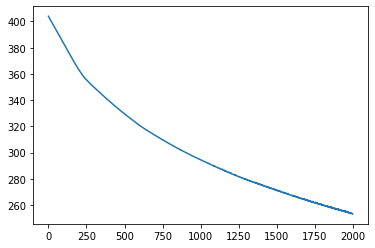

lr:  1e-11 maxItr:  2000
Intial Loss:  404.0
Final loss: 220.52801161225534

W: [ 6.00727987e-06  1.05138494e-05  2.13506488e-05 ...  5.03318984e-06
  4.93320982e-06 -1.27787989e-05]
Bias: -1.978799999999998e-07


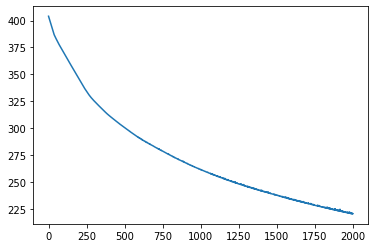

lr:  1e-11 maxItr:  2000
Intial Loss:  404.0
Final loss: 205.72672418012027

W: [2.87485385e-05 2.41748788e-05 2.50731989e-05 ... 2.75839685e-05
 3.15924682e-05 3.08427483e-05]
Bias: -9.883999999999967e-08


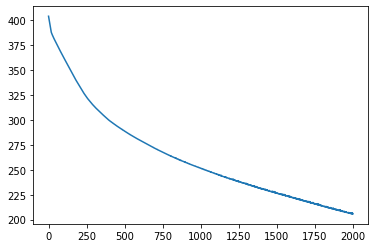

lr:  1e-11 maxItr:  2000
Intial Loss:  404.0
Final loss: 219.83099760267362

W: [ 6.64555966e-06  7.97086947e-06  1.85065389e-05 ... -3.84446969e-06
 -3.35256974e-06 -3.01967980e-05]
Bias: -1.1473999999999986e-07


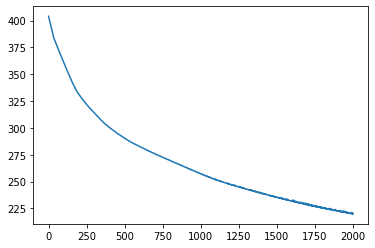

lr:  1e-11 maxItr:  2000
Intial Loss:  404.0
Final loss: 197.40340031726015

W: [2.57466185e-05 1.68755490e-05 2.44728088e-05 ... 1.54534890e-05
 1.93619987e-05 1.28710492e-05]
Bias: -3.914999999999993e-08


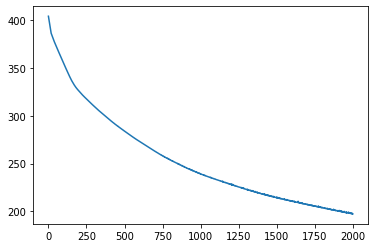

lr:  1e-11 maxItr:  2000
Intial Loss:  404.0
Final loss: 168.5791944982588

W: [2.82450385e-05 2.00942190e-05 1.72052893e-05 ... 1.85449088e-05
 2.33208384e-05 3.25598377e-05]
Bias: 1.0229000000000017e-07


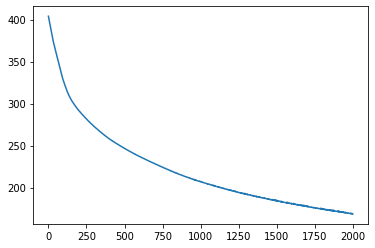

In [126]:
svm_classifiers = trainSVMs(img_data, labels, lr = 0.00000000001,maxItr=2000)

In [129]:
import pprint as pp

In [130]:
pp.pprint(svm_classifiers)

{0: {1: (array([-4.72146974e-06, -2.14063990e-06, -7.37739953e-06, ...,
        3.35920987e-06,  3.66854989e-06,  1.53035793e-05]),
         -1.7259999999999997e-08),
     2: (array([ 6.00727987e-06,  1.05138494e-05,  2.13506488e-05, ...,
        5.03318984e-06,  4.93320982e-06, -1.27787989e-05]),
         -1.978799999999998e-07),
     3: (array([2.87485385e-05, 2.41748788e-05, 2.50731989e-05, ...,
       2.75839685e-05, 3.15924682e-05, 3.08427483e-05]),
         -9.883999999999967e-08)},
 1: {2: (array([ 6.64555966e-06,  7.97086947e-06,  1.85065389e-05, ...,
       -3.84446969e-06, -3.35256974e-06, -3.01967980e-05]),
         -1.1473999999999986e-07),
     3: (array([2.57466185e-05, 1.68755490e-05, 2.44728088e-05, ...,
       1.54534890e-05, 1.93619987e-05, 1.28710492e-05]),
         -3.914999999999993e-08)},
 2: {3: (array([2.82450385e-05, 2.00942190e-05, 1.72052893e-05, ...,
       1.85449088e-05, 2.33208384e-05, 3.25598377e-05]),
         1.0229000000000017e-07)},
 3: {}}


# Prediction

In [131]:
def binaryPredict(x,wts,bias):
    z = np.dot(x,wts.T) + bias
    if z >= 0:
        return +1
    else :
        return -1

In [132]:
def predict(x):
    count = np.zeros(CLASSES)
    for i in range(CLASSES):
        for j in range(i+1, CLASSES):
            wts, bias = svm_classifiers[i][j]
            z = binaryPredict(x, wts, bias)
            if z == 1:
                count[j] += 1
            else:
                count[i] += 1 
                
#     print(count)
    final_prediction = np.argmax(count)
    return final_prediction

In [133]:
print(predict(img_data[0]))
print (label[0])

0
h


In [134]:
def accuracy():
    count = 0
    for i in range(img_data.shape[0]):
        pred = predict(img_data[i])
        if pred == labels[i]:
            count += 1
            
    return count/img_data.shape[0]

In [135]:
print(accuracy())

0.5693069306930693